In [24]:
import langgraph
from langgraph.graph import StateGraph, START,END
from typing import TypedDict , Literal
from IPython.display import Image, display

In [25]:
class dataobject(TypedDict):
    usd : float
    total_usd : float
    conversion_currency : Literal["inr",'uro']
    total : float

In [26]:
#tools

def total_usd_amount(state : dataobject) -> dataobject:

    state['total_usd'] = state['usd'] * 1.5


    return state

def usd_to_inr(state : dataobject) -> dataobject:

    state['total'] = state['total_usd'] * 90
    
    return state

def usd_to_eur(state : dataobject) -> dataobject:

    state['total'] = state['total_usd'] * 9
    
    return state

def choose_conversion_type(state : dataobject) -> str:
    return state['conversion_currency']

In [27]:
builder = StateGraph(dataobject)

builder.add_node("calc_total_usd", total_usd_amount)

builder.add_node("convert_usd_to_inr", usd_to_inr)

builder.add_node("convert_usd_to_eur", usd_to_eur)

In [28]:
builder.add_edge(START, 'calc_total_usd')

builder.add_conditional_edges(
    
    "calc_total_usd",
    choose_conversion_type,
    {
        'inr' : 'convert_usd_to_inr',
        'uro': 'convert_usd_to_eur',
    }
)

builder.add_edge(['convert_usd_to_inr','convert_usd_to_eur'],END)

graph = builder.compile()

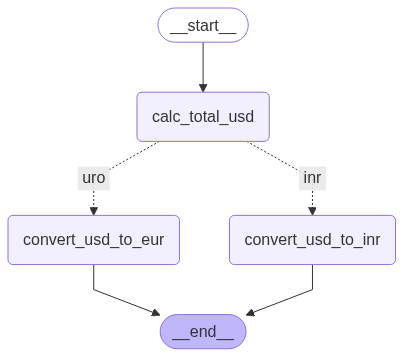

In [29]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
graph.invoke({'usd':1000, 'conversion_currency':'inr'})

{'usd': 1000,
 'total_usd': 1500.0,
 'conversion_currency': 'inr',
 'total': 135000.0}